# Dataframe Manipulation Warmup

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
np.random.seed(406)

n = 5000
df = pd.DataFrame({
    'favorite_animal': np.random.choice(['cat', 'dog', 'frog', 'lemur', 'panda'], n),
    'favorite_vegetable': np.random.choice(['brussel sprouts', 'potato', 'squash'], n),
    'favorite_fruit': np.random.choice(['banana', 'apple', 'blueberries'], n),
    'wears_glasses': np.random.choice(['yes', 'no'], n),
    'netflix_consumption': np.random.normal(10, 2, n),
    'open_browser_tabs': np.random.randint(2, 90, n),
})

- What is the highest amount of netflix consumption? `17.535`
- How many people wear glasses? What percentage of people is this? `2555`, `.511`
- How many people's favorite animal is a dog? `1002`
- What is the most common favorite animal? `lemur`
- What is the average netflix consumption for people that prefer brussel
  sprouts? `10.008`
- What is the most common favorite fruit for people who wear glasses and have
  more than 40 open browser tabs? `blueberries`
- What percentage of people have a netflix consumption lower than 7? `.0716`
- What is the average netflix consumption for people with less than 30 open
  browser tabs? `9.91935`
- How many people *don't* wear glasses, have a favorite animal of a panda, have
  a favorite fruit of blueberries, and have more than 60 open browser tabs? What
  is the median netflix consumption for this group? What is the most common
  favorite vegetable for this group? `46`, `10.455`, `potato`
- What is the least popular combination of favorite fruit and vegetable? `apple` and `potato`
- Which combination of favorite animal and wearing glasses has the highest average
  netflix consumption? people that wear glasses and prefer pandas
- **Bonus**: for each of the above questions, what kind of visualization would
  be the most effective in conveying your answer?

In [12]:
#df.sort_values(by = 'netflix_consumption', ascending = False)
df.netflix_consumption.max()

17.534818515438925

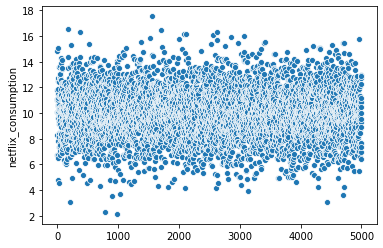

In [133]:
sns.scatterplot(x=df.index, y =df.netflix_consumption)

In [13]:
df.head()

,favorite_animal,favorite_vegetable,favorite_fruit,wears_glasses,netflix_consumption,open_browser_tabs
0,lemur,potato,apple,yes,8.313351,44
1,panda,potato,apple,yes,11.801073,10
2,cat,squash,blueberries,yes,10.105141,35
3,lemur,squash,apple,no,11.024605,70
4,dog,brussel sprouts,apple,yes,6.732698,73


In [20]:
df[df.wears_glasses == 'yes'].shape[0]

2555

In [21]:
df[df.wears_glasses == 'yes'].shape[0]/df.shape[0]

0.511

How many people's favorite animal is a dog? 1002

In [23]:
df[df.favorite_animal == 'dog'].shape[0]

1002

What is the most common favorite animal?

In [146]:
df_fav_ani = df.groupby('favorite_animal').agg('count')
df_fav_ani

,favorite_vegetable,favorite_fruit,wears_glasses,netflix_consumption,open_browser_tabs
favorite_animal,,,,,
cat,980,980,980,980,980
dog,1002,1002,1002,1002,1002
frog,1015,1015,1015,1015,1015
lemur,1028,1028,1028,1028,1028
panda,975,975,975,975,975


In [140]:
df_fav_ani['favorite_vegetable'].max()

1028

What is the average netflix consumption for people that prefer brussel sprouts? 

In [56]:
df.head()

,favorite_animal,favorite_vegetable,favorite_fruit,wears_glasses,netflix_consumption,open_browser_tabs
0,lemur,potato,apple,yes,8.313351,44
1,panda,potato,apple,yes,11.801073,10
2,cat,squash,blueberries,yes,10.105141,35
3,lemur,squash,apple,no,11.024605,70
4,dog,brussel sprouts,apple,yes,6.732698,73


In [61]:
df[df.favorite_vegetable == 'brussel sprouts'].netflix_consumption.mean()

10.00847154798366

What is the most common favorite fruit for people who wear glasses and have more than 40 open browser tabs? 

In [66]:
df_1= df[(df.wears_glasses == 'yes') & (df.open_browser_tabs > 40)]

In [70]:
df_1.head()
df_1.groupby('favorite_fruit').agg('count')

,favorite_animal,favorite_vegetable,wears_glasses,netflix_consumption,open_browser_tabs
favorite_fruit,,,,,
apple,477,477,477,477,477
banana,472,472,472,472,472
blueberries,498,498,498,498,498


What percentage of people have a netflix consumption lower than 7? 

In [149]:
(df.netflix_consumption < 7).mean()

0.0716

What is the average netflix consumption for people with less than 30 open browser tabs?

In [76]:
df[df.open_browser_tabs < 30].netflix_consumption.mean()

9.91935736918227

How many people don't wear glasses, have a favorite animal of a panda, have a favorite fruit of blueberries, and have more than 60 open browser tabs? 

In [89]:
df2= df[(df.wears_glasses == 'no') & (df.favorite_animal == 'panda') & (df.favorite_fruit == 'blueberries') & (df.open_browser_tabs > 60)]

What is the median netflix consumption for this group? What is the most common favorite vegetable for this group?

In [98]:
df2.shape[0]

46

In [150]:
df2.netflix_consumption.median()

10.45479760071613

In [155]:
df2.groupby('favorite_vegetable').agg('count')

,favorite_animal,favorite_fruit,wears_glasses,netflix_consumption,open_browser_tabs
favorite_vegetable,,,,,
brussel sprouts,14,14,14,14,14
potato,19,19,19,19,19
squash,13,13,13,13,13


What is the least popular combination of favorite fruit and vegetable? 

In [95]:
df.head()

,favorite_animal,favorite_vegetable,favorite_fruit,wears_glasses,netflix_consumption,open_browser_tabs
0,lemur,potato,apple,yes,8.313351,44
1,panda,potato,apple,yes,11.801073,10
2,cat,squash,blueberries,yes,10.105141,35
3,lemur,squash,apple,no,11.024605,70
4,dog,brussel sprouts,apple,yes,6.732698,73


In [103]:
CT = pd.crosstab(df.favorite_vegetable, df.favorite_fruit)

In [106]:
CT

favorite_fruit,apple,banana,blueberries
favorite_vegetable,,,
brussel sprouts,565,576,555
potato,512,570,560
squash,555,524,583


Which combination of favorite animal and wearing glasses has the highest average netflix consumption? people that wear glasses and prefer pandas

In [108]:
CT1 = pd.crosstab(df.favorite_animal, df.wears_glasses)

In [109]:
CT1

wears_glasses,no,yes
favorite_animal,,
cat,471,509
dog,490,512
frog,461,554
lemur,547,481
panda,476,499


In [127]:
df3 = df.groupby(['favorite_animal', 'wears_glasses']).agg('mean')
df3

netflix_consumption  open_browser_tabs
favorite_animal wears_glasses                                        
cat             no                        9.846183          44.210191
                yes                       9.884685          44.970530
dog             no                        9.933246          46.593878
                yes                      10.087352          46.953125
frog            no                        9.962311          45.375271
                yes                       9.834740          46.167870
lemur           no                       10.024557          47.372943
                yes                      10.010196          46.677755
panda           no                        9.946293          44.665966
                yes                      10.092273          46.180361

In [156]:
df3.netflix_consumption.idxmax()

('panda', 'yes')